In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

import requests
from bs4 import BeautifulSoup
import re
import time
import os

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False


In [2]:
blood = pd.read_csv('blood data/시·도별_인구대비_헌혈실적_2005_2019.csv',  encoding='CP949', header=None)
blood

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,시·도별(1),2005,2005,2005,2006,2006,2006,2007,2007,2007,...,2016,2017,2017,2017,2018,2018,2018,2019,2019,2019
1,시·도별(1),헌혈실적 (건),헌혈률 (%),인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명),...,인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명)
2,합계,2274336,4.7,48138077,2302542,4.8,48297184,2087762,4.3,48456369,...,50801405,2928670,5.7,51446201,2883270,5.6,51635256,2791092,5.4,51849861
3,서울,760596,7.6,10011324,793327,7.9,10020123,747542,7.5,10025669,...,9834687,1015159,10.4,9776305,975868,10.0,9721190,900964,9.3,9729107
4,부산,214551,6.0,3586087,213811,6.0,3554003,190408,5.4,3525220,...,3388631,215280,6.3,3428923,223730,6.5,3418011,213597,6.3,3413841
5,대구경북,195029,3.8,5158051,190002,3.7,5132158,158320,3.1,5104874,...,5092303,240804,4.7,5146365,246175,4.8,5141620,232482,4.6,5103867
6,인천,132426,5.1,2578356,123896,4.8,2596317,113310,4.3,2612866,...,2914455,163724,5.6,2923047,157493,5.4,2942005,158557,5.4,2957026
7,경기,139991,1.3,10612455,143177,1.3,10822060,130461,1.2,11039291,...,12519009,211129,1.6,12809379,204183,1.6,12955219,211443,1.6,13239666
8,강원,84507,5.7,1488365,77459,5.2,1479284,65018,4.4,1470447,...,1511017,154964,10.2,1520785,161359,10.6,1524406,153606,10.0,1541502
9,충북,77356,5.2,1484191,79003,5.3,1484406,72803,4.9,1483401,...,1566690,95644,6.0,1605139,93808,5.8,1612881,94251,5.9,1600007


In [3]:
blood_co = blood.copy()

In [4]:
blood_co.rename(columns=blood_co.iloc[1], inplace= True)

In [5]:
blood_co= blood_co.drop(columns=['헌혈률 (%)','인구수 (명)'])
blood_co

,시·도별(1),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건)
0,시·도별(1),2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,시·도별(1),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건)
2,합계,2274336,2302542,2087762,2347184,2569954,2664492,2616575,2722608,2914483,3053425,3082918,2866330,2928670,2883270,2791092
3,서울,760596,793327,747542,838492,924605,954551,918763,964923,1036438,1085001,1062324,1008947,1015159,975868,900964
4,부산,214551,213811,190408,210650,217109,233701,217110,218927,230966,235854,238050,205028,215280,223730,213597
5,대구경북,195029,190002,158320,188625,216160,213828,212001,227200,244949,263853,260314,236917,240804,246175,232482
6,인천,132426,123896,113310,124019,132576,154954,175120,173630,178018,185952,181013,161924,163724,157493,158557
7,경기,139991,143177,130461,142566,165455,171747,176920,175999,191485,206531,218945,205846,211129,204183,211443
8,강원,84507,77459,65018,73491,80058,83792,92295,108305,120455,128006,149795,149851,154964,161359,153606
9,충북,77356,79003,72803,84955,99447,101209,91354,100097,98145,100191,99627,89342,95644,93808,94251


In [6]:
blood_co.drop(index=[0,1], inplace=True)

In [7]:
blood_co2=blood_co.drop(columns='시·도별(1)').astype(int)
blood_co2

,헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건)
2,2274336,2302542,2087762,2347184,2569954,2664492,2616575,2722608,2914483,3053425,3082918,2866330,2928670,2883270,2791092
3,760596,793327,747542,838492,924605,954551,918763,964923,1036438,1085001,1062324,1008947,1015159,975868,900964
4,214551,213811,190408,210650,217109,233701,217110,218927,230966,235854,238050,205028,215280,223730,213597
5,195029,190002,158320,188625,216160,213828,212001,227200,244949,263853,260314,236917,240804,246175,232482
6,132426,123896,113310,124019,132576,154954,175120,173630,178018,185952,181013,161924,163724,157493,158557
7,139991,143177,130461,142566,165455,171747,176920,175999,191485,206531,218945,205846,211129,204183,211443
8,84507,77459,65018,73491,80058,83792,92295,108305,120455,128006,149795,149851,154964,161359,153606
9,77356,79003,72803,84955,99447,101209,91354,100097,98145,100191,99627,89342,95644,93808,94251
10,162539,147671,148281,175573,185884,194976,192337,208438,226335,234571,251975,239081,242643,249417,249947
11,120915,118604,98174,107833,121245,124784,125506,127924,131428,125427,128878,116117,114233,108594,108908


In [8]:
blood_co

,시·도별(1),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건)
2,합계,2274336,2302542,2087762,2347184,2569954,2664492,2616575,2722608,2914483,3053425,3082918,2866330,2928670,2883270,2791092
3,서울,760596,793327,747542,838492,924605,954551,918763,964923,1036438,1085001,1062324,1008947,1015159,975868,900964
4,부산,214551,213811,190408,210650,217109,233701,217110,218927,230966,235854,238050,205028,215280,223730,213597
5,대구경북,195029,190002,158320,188625,216160,213828,212001,227200,244949,263853,260314,236917,240804,246175,232482
6,인천,132426,123896,113310,124019,132576,154954,175120,173630,178018,185952,181013,161924,163724,157493,158557
7,경기,139991,143177,130461,142566,165455,171747,176920,175999,191485,206531,218945,205846,211129,204183,211443
8,강원,84507,77459,65018,73491,80058,83792,92295,108305,120455,128006,149795,149851,154964,161359,153606
9,충북,77356,79003,72803,84955,99447,101209,91354,100097,98145,100191,99627,89342,95644,93808,94251
10,대전세종충남,162539,147671,148281,175573,185884,194976,192337,208438,226335,234571,251975,239081,242643,249417,249947
11,전북,120915,118604,98174,107833,121245,124784,125506,127924,131428,125427,128878,116117,114233,108594,108908


In [9]:
blood_co2.set_index(blood_co['시·도별(1)'], inplace=True)
blood_co2

,헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건)
시·도별(1),,,,,,,,,,,,,,,
합계,2274336,2302542,2087762,2347184,2569954,2664492,2616575,2722608,2914483,3053425,3082918,2866330,2928670,2883270,2791092
서울,760596,793327,747542,838492,924605,954551,918763,964923,1036438,1085001,1062324,1008947,1015159,975868,900964
부산,214551,213811,190408,210650,217109,233701,217110,218927,230966,235854,238050,205028,215280,223730,213597
대구경북,195029,190002,158320,188625,216160,213828,212001,227200,244949,263853,260314,236917,240804,246175,232482
인천,132426,123896,113310,124019,132576,154954,175120,173630,178018,185952,181013,161924,163724,157493,158557
경기,139991,143177,130461,142566,165455,171747,176920,175999,191485,206531,218945,205846,211129,204183,211443
강원,84507,77459,65018,73491,80058,83792,92295,108305,120455,128006,149795,149851,154964,161359,153606
충북,77356,79003,72803,84955,99447,101209,91354,100097,98145,100191,99627,89342,95644,93808,94251
대전세종충남,162539,147671,148281,175573,185884,194976,192337,208438,226335,234571,251975,239081,242643,249417,249947


In [10]:
rename = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

In [11]:
blood_co2.columns=rename

In [20]:
blood_co3 = blood_co2.drop(index='합계')
blood_co3

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
시·도별(1),,,,,,,,,,,,,,,
서울,760596,793327,747542,838492,924605,954551,918763,964923,1036438,1085001,1062324,1008947,1015159,975868,900964
부산,214551,213811,190408,210650,217109,233701,217110,218927,230966,235854,238050,205028,215280,223730,213597
대구경북,195029,190002,158320,188625,216160,213828,212001,227200,244949,263853,260314,236917,240804,246175,232482
인천,132426,123896,113310,124019,132576,154954,175120,173630,178018,185952,181013,161924,163724,157493,158557
경기,139991,143177,130461,142566,165455,171747,176920,175999,191485,206531,218945,205846,211129,204183,211443
강원,84507,77459,65018,73491,80058,83792,92295,108305,120455,128006,149795,149851,154964,161359,153606
충북,77356,79003,72803,84955,99447,101209,91354,100097,98145,100191,99627,89342,95644,93808,94251
대전세종충남,162539,147671,148281,175573,185884,194976,192337,208438,226335,234571,251975,239081,242643,249417,249947
전북,120915,118604,98174,107833,121245,124784,125506,127924,131428,125427,128878,116117,114233,108594,108908


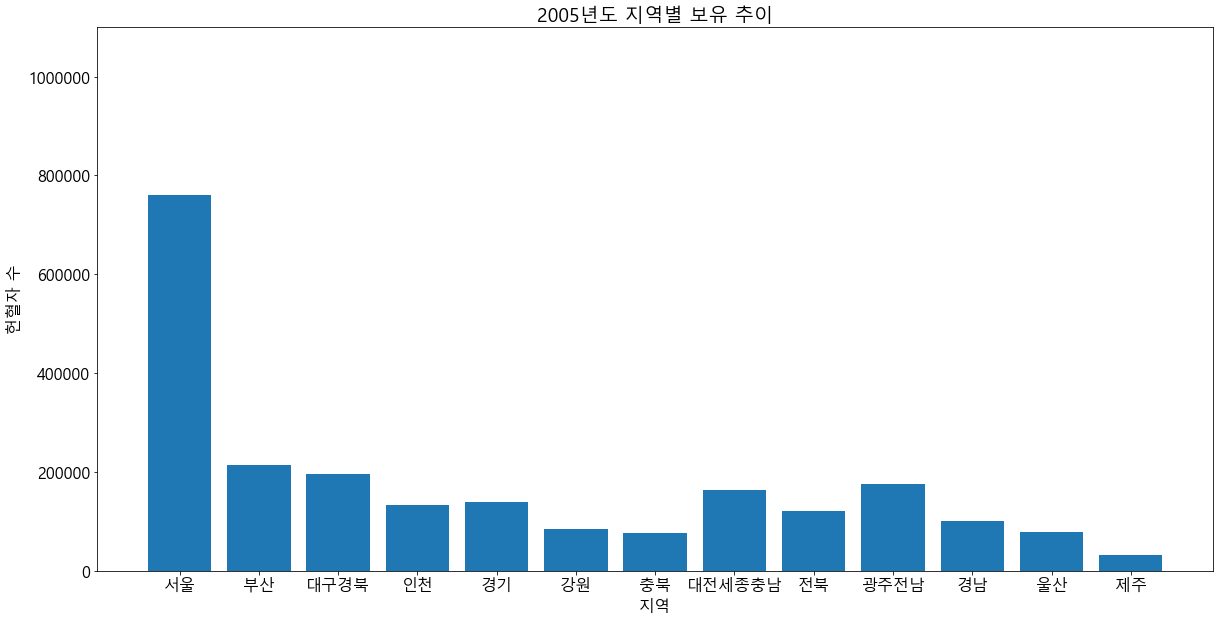

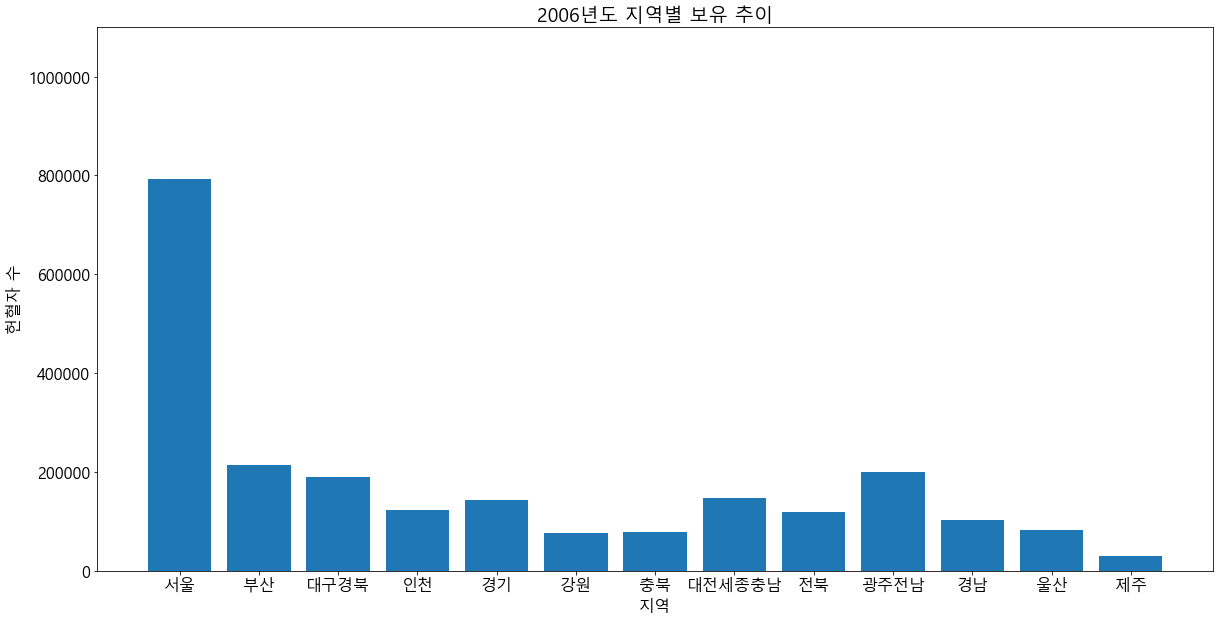

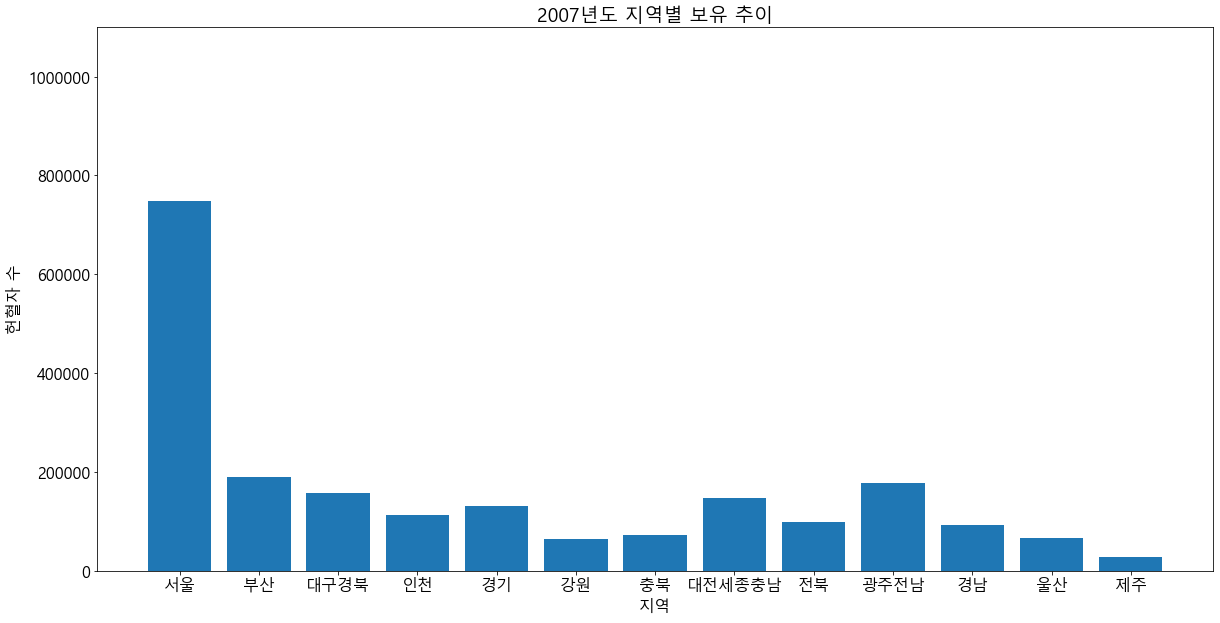

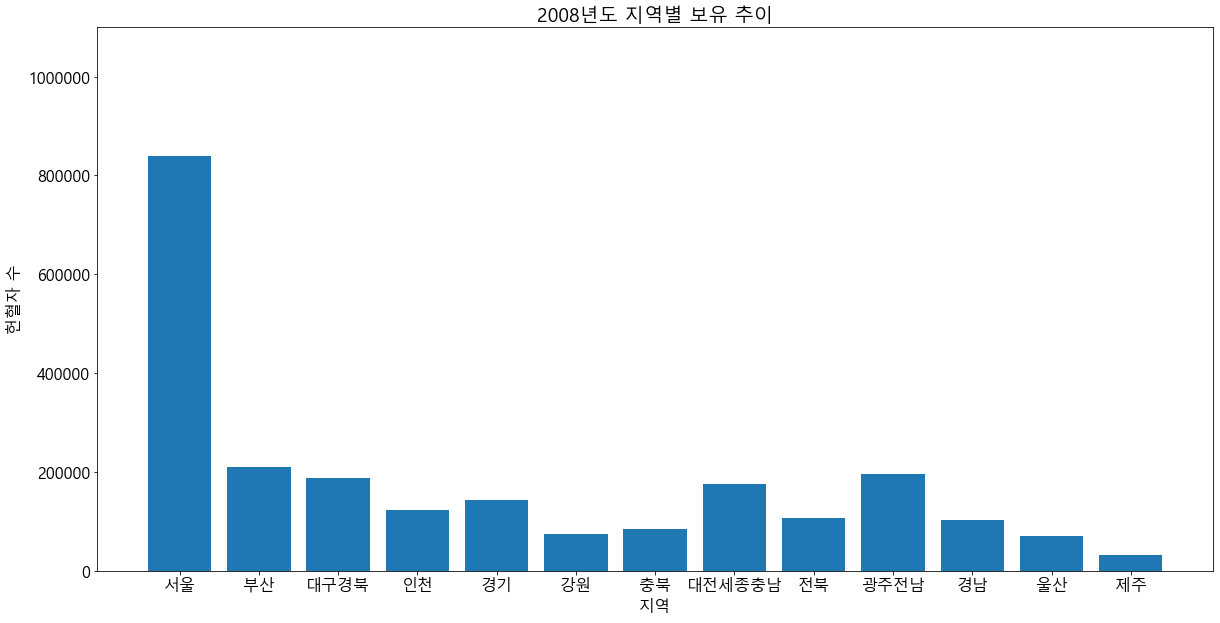

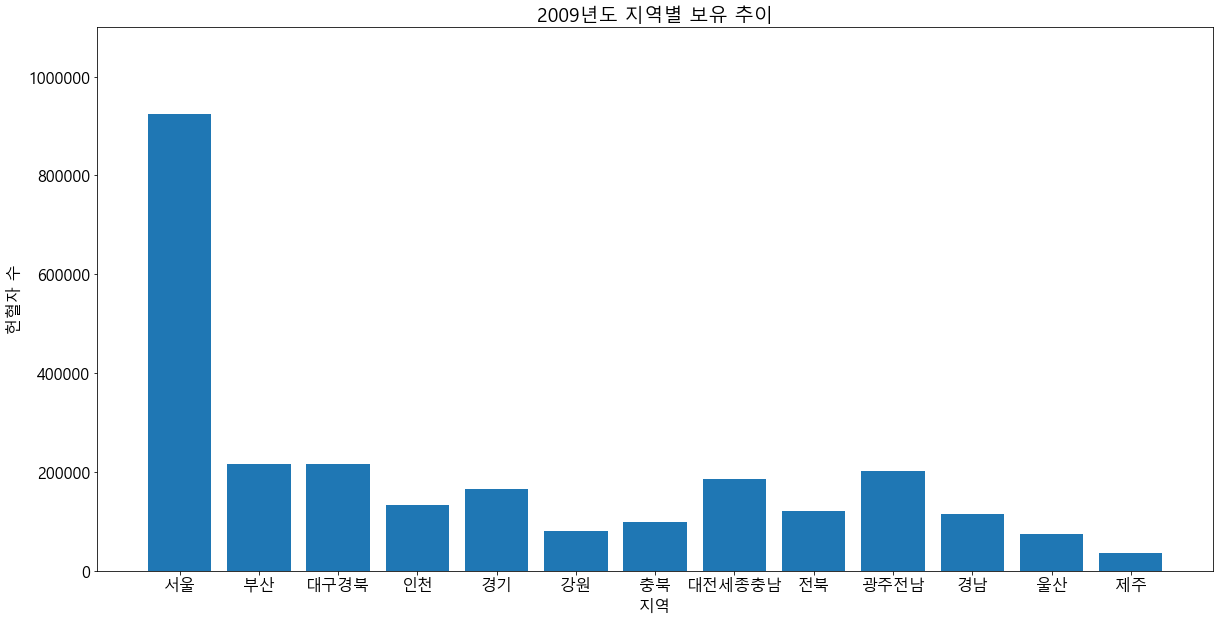

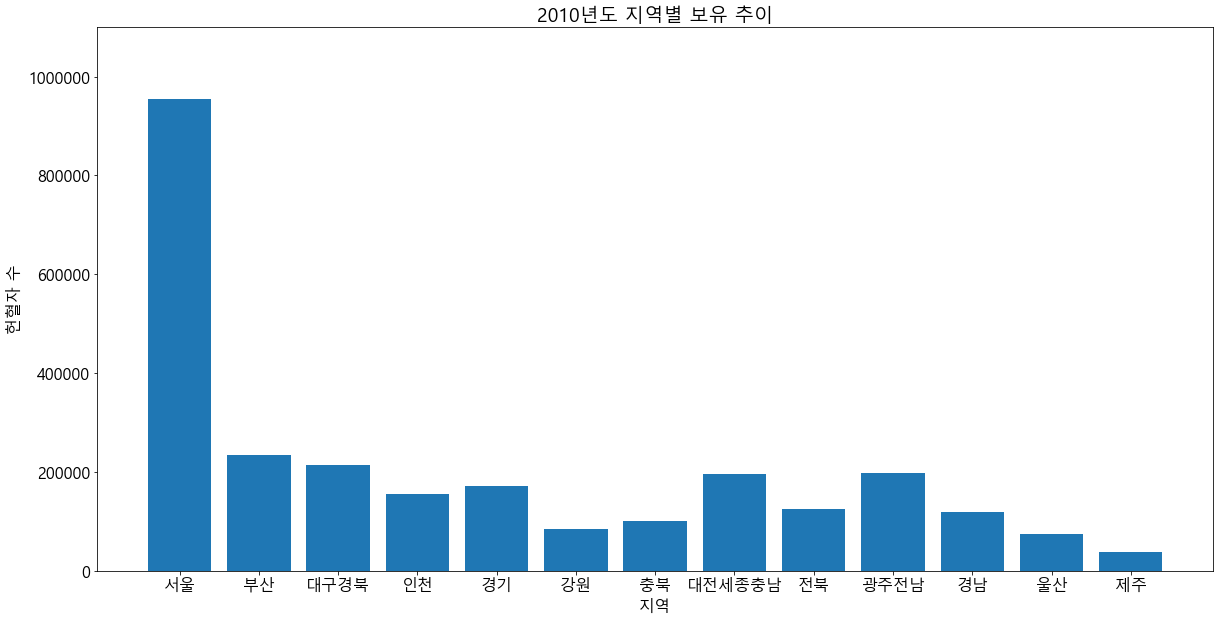

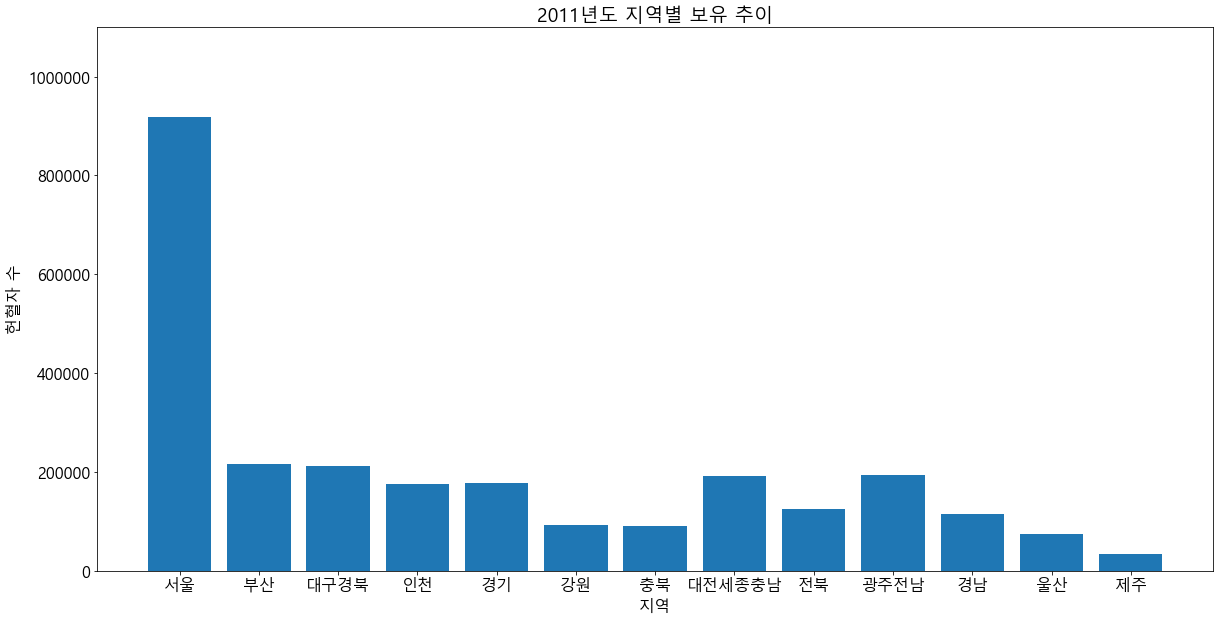

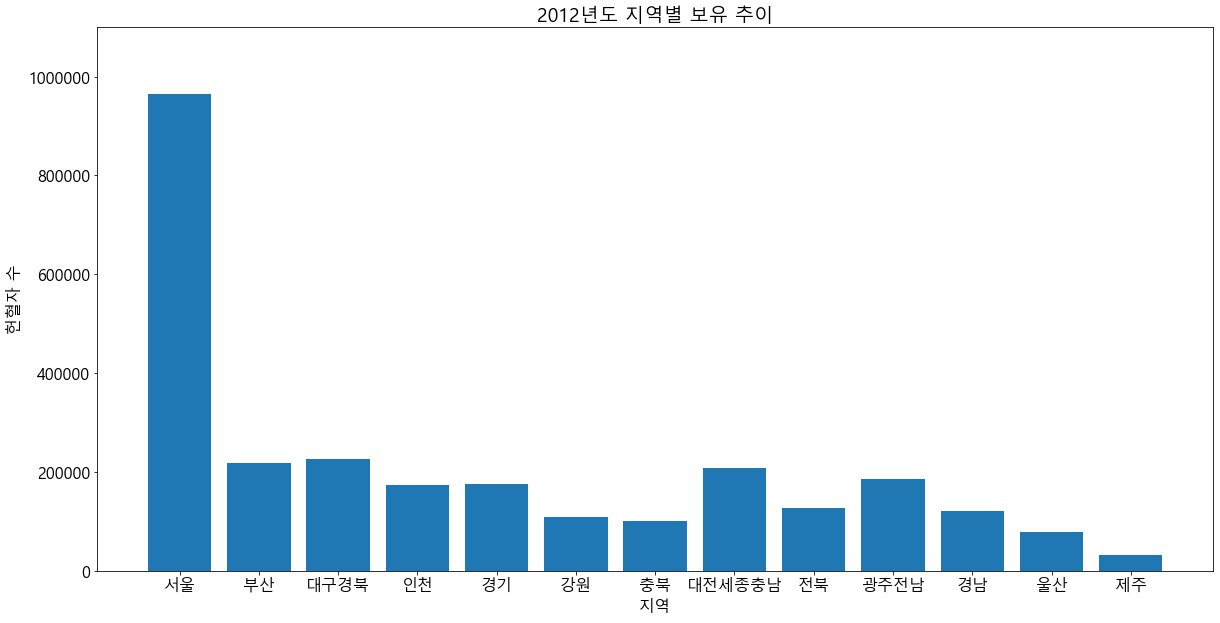

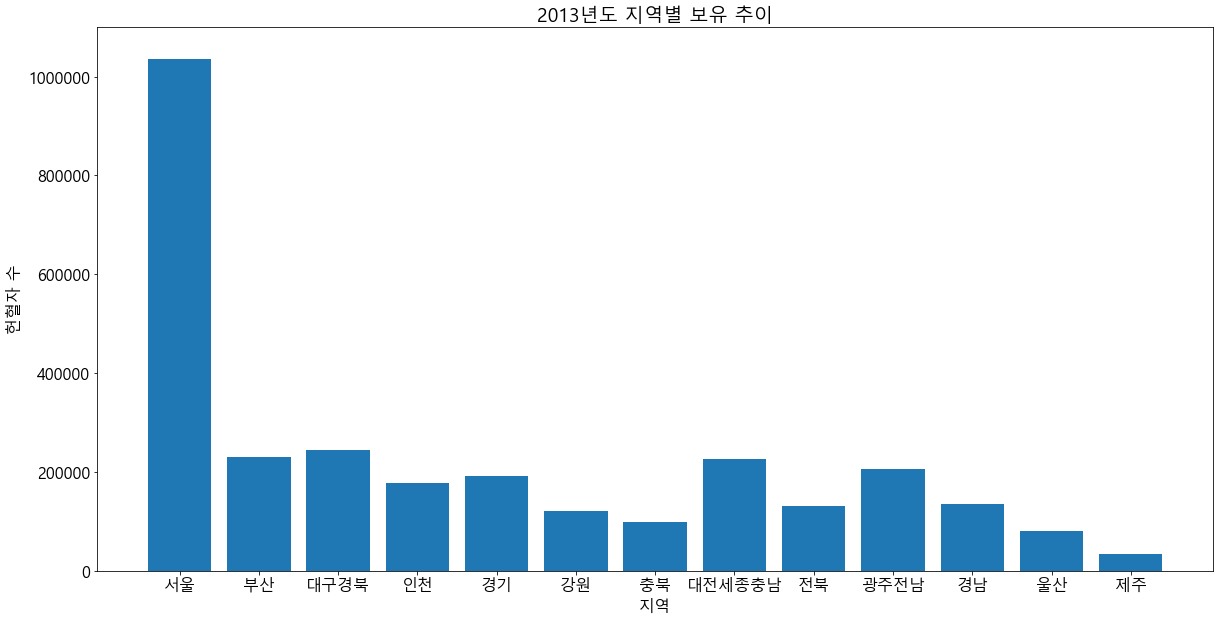

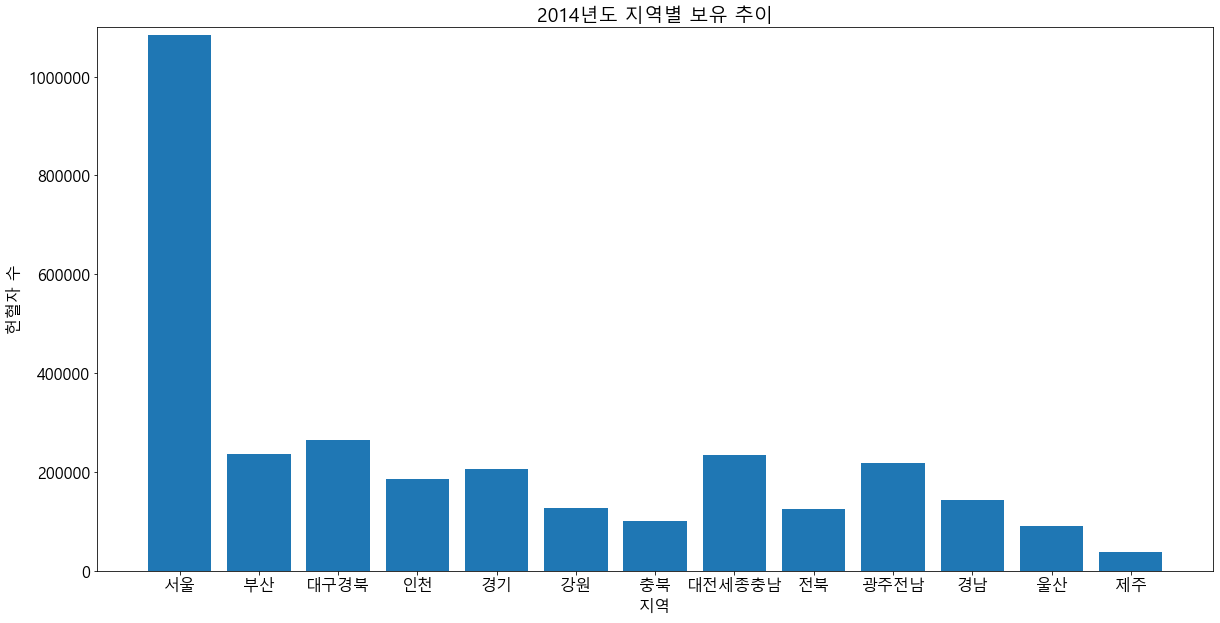

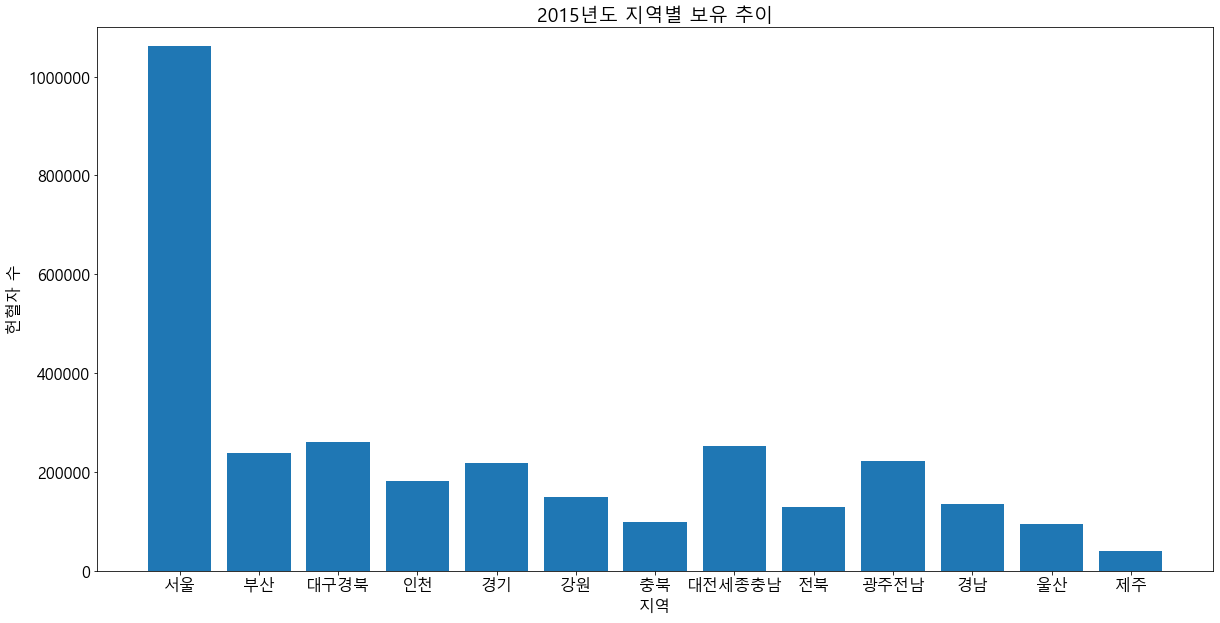

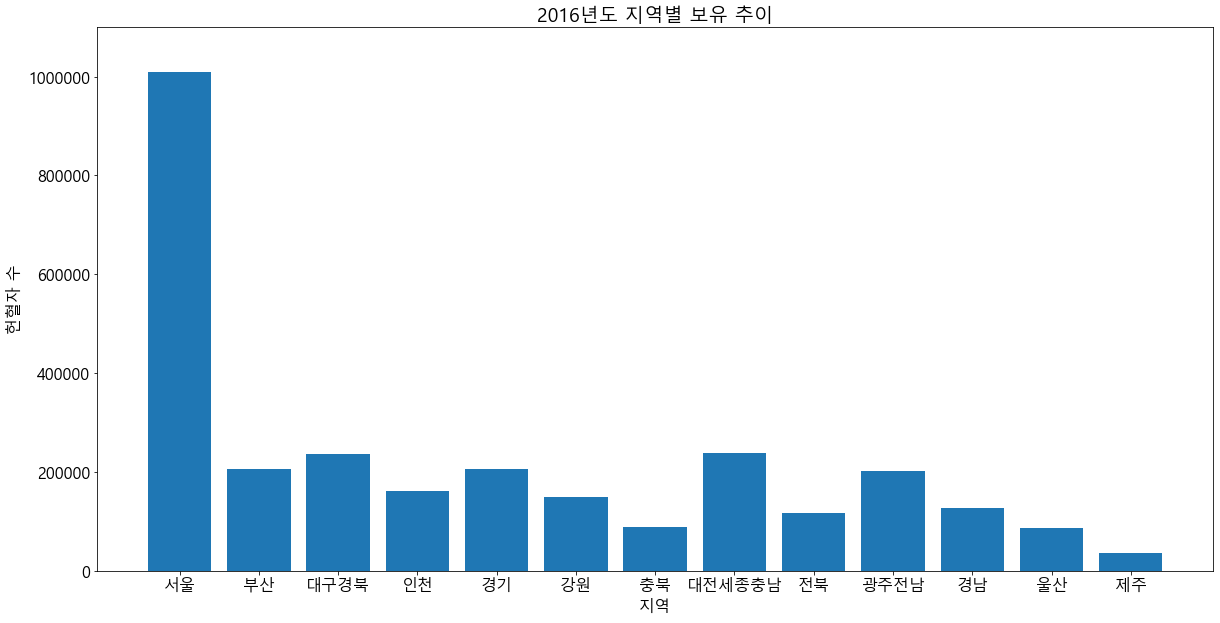

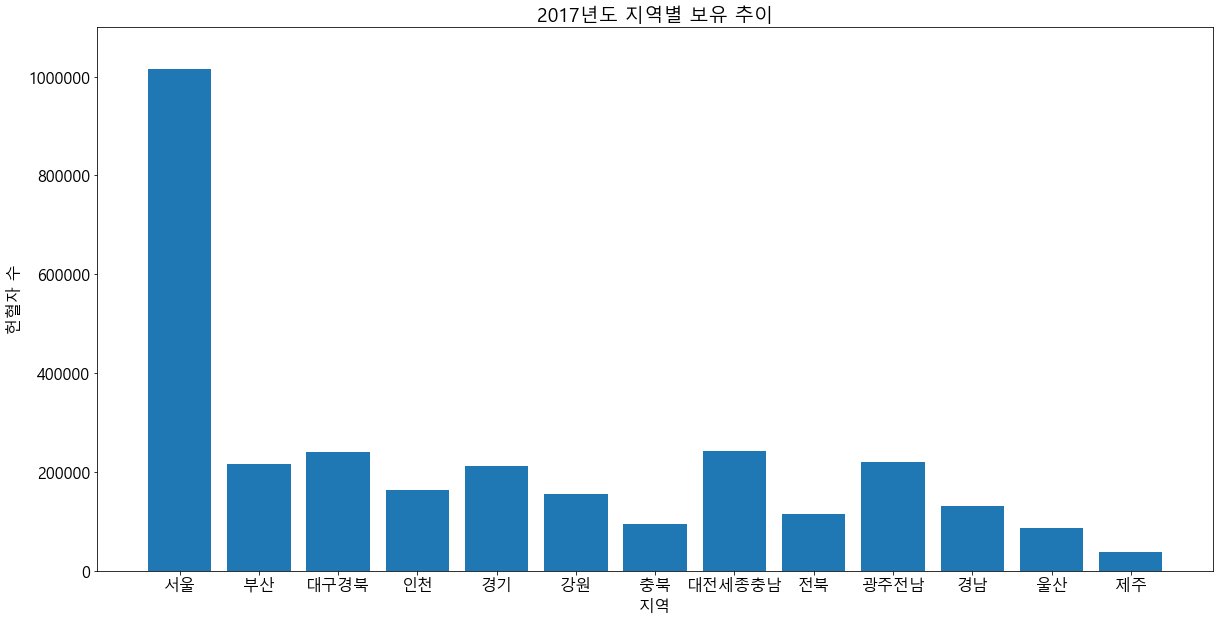

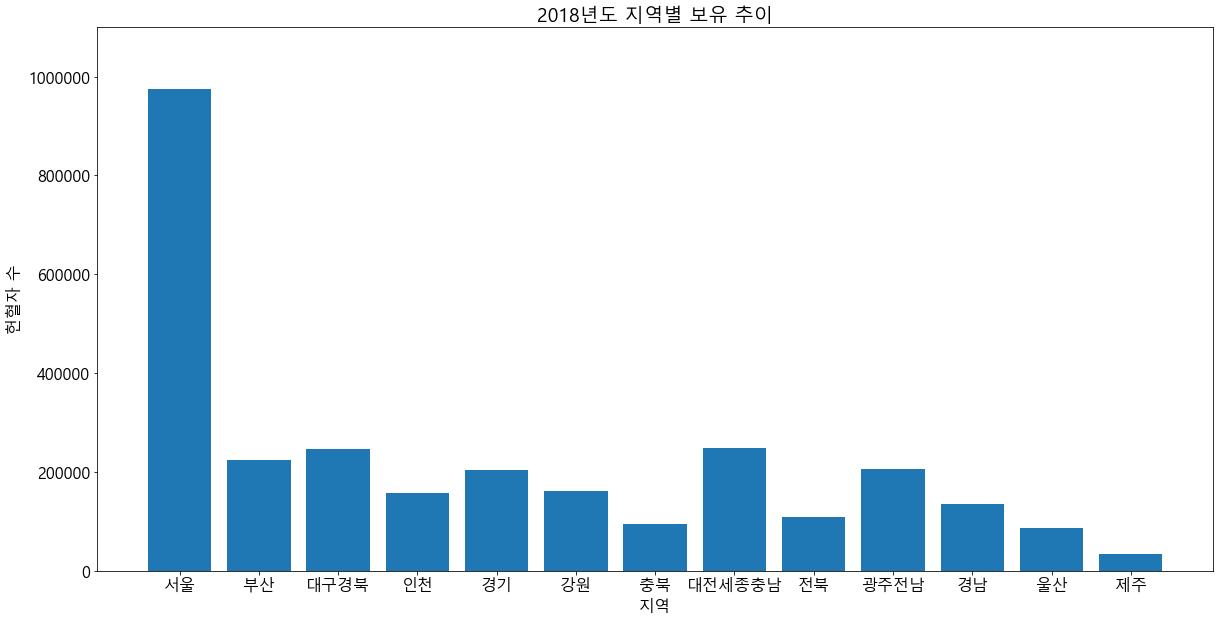

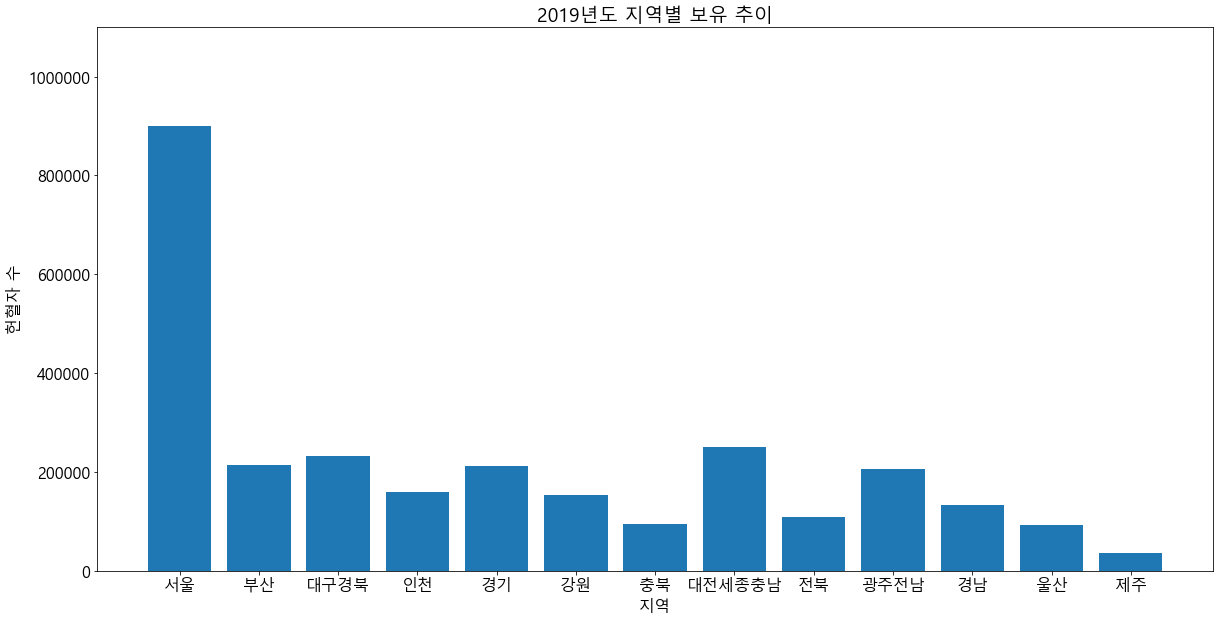

In [32]:
for i in blood_co3.columns:
    plt.bar(blood_co3.index, blood_co3[f'{i}'])
    plt.title(f'{i}년도 지역별 보유 추이')
    plt.ylim(0, 1100000)
    plt.xlabel('지역')
    plt.ylabel('헌혈자 수')    
    plt.savefig(f'지역별 헌혈 추이/{i}년도 지역별 혈액 보유(합계x)')
#     plt.cla()
    plt.show()

In [34]:
blood_co

,시·도별(1),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건),헌혈실적 (건)
2,합계,2274336,2302542,2087762,2347184,2569954,2664492,2616575,2722608,2914483,3053425,3082918,2866330,2928670,2883270,2791092
3,서울,760596,793327,747542,838492,924605,954551,918763,964923,1036438,1085001,1062324,1008947,1015159,975868,900964
4,부산,214551,213811,190408,210650,217109,233701,217110,218927,230966,235854,238050,205028,215280,223730,213597
5,대구경북,195029,190002,158320,188625,216160,213828,212001,227200,244949,263853,260314,236917,240804,246175,232482
6,인천,132426,123896,113310,124019,132576,154954,175120,173630,178018,185952,181013,161924,163724,157493,158557
7,경기,139991,143177,130461,142566,165455,171747,176920,175999,191485,206531,218945,205846,211129,204183,211443
8,강원,84507,77459,65018,73491,80058,83792,92295,108305,120455,128006,149795,149851,154964,161359,153606
9,충북,77356,79003,72803,84955,99447,101209,91354,100097,98145,100191,99627,89342,95644,93808,94251
10,대전세종충남,162539,147671,148281,175573,185884,194976,192337,208438,226335,234571,251975,239081,242643,249417,249947
11,전북,120915,118604,98174,107833,121245,124784,125506,127924,131428,125427,128878,116117,114233,108594,108908


In [35]:
blood_copy = blood.copy()

In [36]:
blood_copy.rename(columns=blood_copy.iloc[1], inplace= True)

In [38]:
blood_copy= blood_copy.drop(columns=['헌혈실적 (건)','인구수 (명)'])
blood_copy

,시·도별(1),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%)
0,시·도별(1),2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,시·도별(1),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%)
2,합계,4.7,4.8,4.3,4.8,5.3,5.4,5.3,5.4,5.8,6.1,6.1,5.6,5.7,5.6,5.4
3,서울,7.6,7.9,7.5,8.4,9.2,9.5,9.2,9.7,10.4,11.0,10.8,10.3,10.4,10.0,9.3
4,부산,6.0,6.0,5.4,6.0,6.3,6.8,6.3,6.4,6.7,6.9,7.0,6.1,6.3,6.5,6.3
5,대구경북,3.8,3.7,3.1,3.7,4.3,4.3,4.2,4.4,4.8,5.2,5.1,4.7,4.7,4.8,4.6
6,인천,5.1,4.8,4.3,4.7,5.0,5.8,6.5,6.2,6.3,6.5,6.3,5.6,5.6,5.4,5.4
7,경기,1.3,1.3,1.2,1.3,1.4,1.4,1.5,1.5,1.6,1.7,1.8,1.6,1.6,1.6,1.6
8,강원,5.7,5.2,4.4,5.0,5.5,5.8,6.4,7.2,8.0,8.5,9.9,9.9,10.2,10.6,10.0
9,충북,5.2,5.3,4.9,5.7,6.7,6.8,6.2,6.5,6.3,6.4,6.4,5.7,6.0,5.8,5.9


In [40]:
blood_copy.drop(index=[0,1], inplace=True)

In [41]:
blood_copy

,시·도별(1),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%)
2,합계,4.7,4.8,4.3,4.8,5.3,5.4,5.3,5.4,5.8,6.1,6.1,5.6,5.7,5.6,5.4
3,서울,7.6,7.9,7.5,8.4,9.2,9.5,9.2,9.7,10.4,11.0,10.8,10.3,10.4,10.0,9.3
4,부산,6.0,6.0,5.4,6.0,6.3,6.8,6.3,6.4,6.7,6.9,7.0,6.1,6.3,6.5,6.3
5,대구경북,3.8,3.7,3.1,3.7,4.3,4.3,4.2,4.4,4.8,5.2,5.1,4.7,4.7,4.8,4.6
6,인천,5.1,4.8,4.3,4.7,5.0,5.8,6.5,6.2,6.3,6.5,6.3,5.6,5.6,5.4,5.4
7,경기,1.3,1.3,1.2,1.3,1.4,1.4,1.5,1.5,1.6,1.7,1.8,1.6,1.6,1.6,1.6
8,강원,5.7,5.2,4.4,5.0,5.5,5.8,6.4,7.2,8.0,8.5,9.9,9.9,10.2,10.6,10.0
9,충북,5.2,5.3,4.9,5.7,6.7,6.8,6.2,6.5,6.3,6.4,6.4,5.7,6.0,5.8,5.9
10,대전세종충남,4.8,4.3,4.3,5.1,5.4,5.6,5.5,5.7,6.1,6.2,6.6,6.2,6.1,6.2,6.3
11,전북,6.7,6.6,5.5,6.2,7.0,7.3,7.5,7.1,7.3,7.0,7.2,6.5,6.2,5.9,6.0


In [43]:
blood_copy2=blood_copy.drop(columns='시·도별(1)').astype(float)
blood_copy2

,헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%)
2,4.7,4.8,4.3,4.8,5.3,5.4,5.3,5.4,5.8,6.1,6.1,5.6,5.7,5.6,5.4
3,7.6,7.9,7.5,8.4,9.2,9.5,9.2,9.7,10.4,11.0,10.8,10.3,10.4,10.0,9.3
4,6.0,6.0,5.4,6.0,6.3,6.8,6.3,6.4,6.7,6.9,7.0,6.1,6.3,6.5,6.3
5,3.8,3.7,3.1,3.7,4.3,4.3,4.2,4.4,4.8,5.2,5.1,4.7,4.7,4.8,4.6
6,5.1,4.8,4.3,4.7,5.0,5.8,6.5,6.2,6.3,6.5,6.3,5.6,5.6,5.4,5.4
7,1.3,1.3,1.2,1.3,1.4,1.4,1.5,1.5,1.6,1.7,1.8,1.6,1.6,1.6,1.6
8,5.7,5.2,4.4,5.0,5.5,5.8,6.4,7.2,8.0,8.5,9.9,9.9,10.2,10.6,10.0
9,5.2,5.3,4.9,5.7,6.7,6.8,6.2,6.5,6.3,6.4,6.4,5.7,6.0,5.8,5.9
10,4.8,4.3,4.3,5.1,5.4,5.6,5.5,5.7,6.1,6.2,6.6,6.2,6.1,6.2,6.3
11,6.7,6.6,5.5,6.2,7.0,7.3,7.5,7.1,7.3,7.0,7.2,6.5,6.2,5.9,6.0


In [44]:
blood_copy2.set_index(blood_copy['시·도별(1)'], inplace=True)
blood_copy2

,헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%),헌혈률 (%)
시·도별(1),,,,,,,,,,,,,,,
합계,4.7,4.8,4.3,4.8,5.3,5.4,5.3,5.4,5.8,6.1,6.1,5.6,5.7,5.6,5.4
서울,7.6,7.9,7.5,8.4,9.2,9.5,9.2,9.7,10.4,11.0,10.8,10.3,10.4,10.0,9.3
부산,6.0,6.0,5.4,6.0,6.3,6.8,6.3,6.4,6.7,6.9,7.0,6.1,6.3,6.5,6.3
대구경북,3.8,3.7,3.1,3.7,4.3,4.3,4.2,4.4,4.8,5.2,5.1,4.7,4.7,4.8,4.6
인천,5.1,4.8,4.3,4.7,5.0,5.8,6.5,6.2,6.3,6.5,6.3,5.6,5.6,5.4,5.4
경기,1.3,1.3,1.2,1.3,1.4,1.4,1.5,1.5,1.6,1.7,1.8,1.6,1.6,1.6,1.6
강원,5.7,5.2,4.4,5.0,5.5,5.8,6.4,7.2,8.0,8.5,9.9,9.9,10.2,10.6,10.0
충북,5.2,5.3,4.9,5.7,6.7,6.8,6.2,6.5,6.3,6.4,6.4,5.7,6.0,5.8,5.9
대전세종충남,4.8,4.3,4.3,5.1,5.4,5.6,5.5,5.7,6.1,6.2,6.6,6.2,6.1,6.2,6.3


In [45]:
blood_copy2.columns=rename

In [54]:
blood_copy2

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
시·도별(1),,,,,,,,,,,,,,,
합계,4.7,4.8,4.3,4.8,5.3,5.4,5.3,5.4,5.8,6.1,6.1,5.6,5.7,5.6,5.4
서울,7.6,7.9,7.5,8.4,9.2,9.5,9.2,9.7,10.4,11.0,10.8,10.3,10.4,10.0,9.3
부산,6.0,6.0,5.4,6.0,6.3,6.8,6.3,6.4,6.7,6.9,7.0,6.1,6.3,6.5,6.3
대구경북,3.8,3.7,3.1,3.7,4.3,4.3,4.2,4.4,4.8,5.2,5.1,4.7,4.7,4.8,4.6
인천,5.1,4.8,4.3,4.7,5.0,5.8,6.5,6.2,6.3,6.5,6.3,5.6,5.6,5.4,5.4
경기,1.3,1.3,1.2,1.3,1.4,1.4,1.5,1.5,1.6,1.7,1.8,1.6,1.6,1.6,1.6
강원,5.7,5.2,4.4,5.0,5.5,5.8,6.4,7.2,8.0,8.5,9.9,9.9,10.2,10.6,10.0
충북,5.2,5.3,4.9,5.7,6.7,6.8,6.2,6.5,6.3,6.4,6.4,5.7,6.0,5.8,5.9
대전세종충남,4.8,4.3,4.3,5.1,5.4,5.6,5.5,5.7,6.1,6.2,6.6,6.2,6.1,6.2,6.3


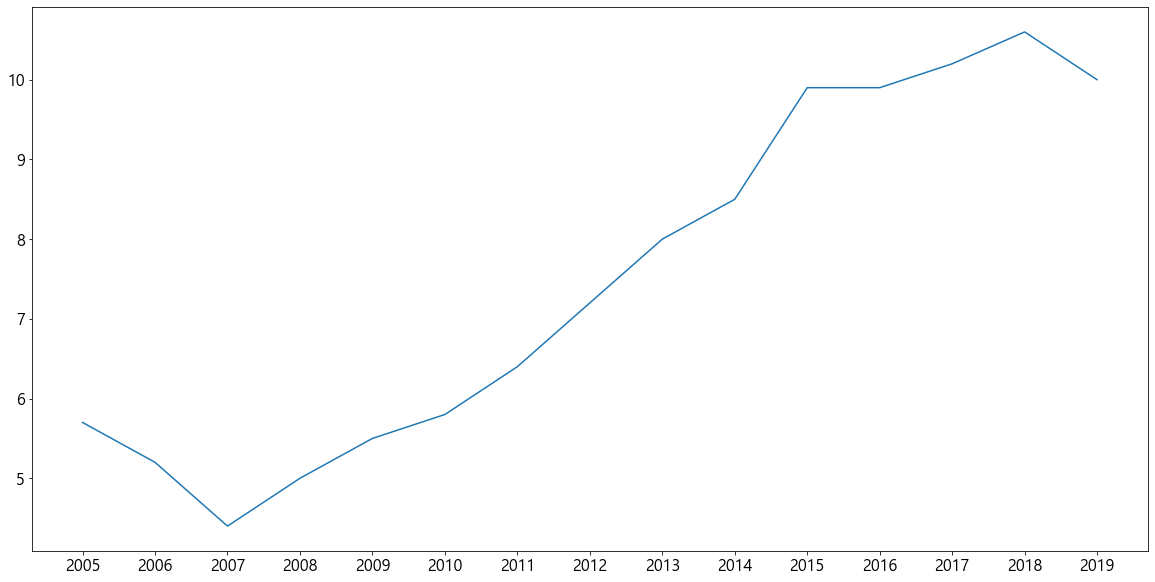

In [55]:
plt.plot(blood_copy2.loc['강원'])
plt.show()

In [66]:
blood_copy3 = blood_copy2.drop(index='합계')
blood_copy3

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
시·도별(1),,,,,,,,,,,,,,,
서울,7.6,7.9,7.5,8.4,9.2,9.5,9.2,9.7,10.4,11.0,10.8,10.3,10.4,10.0,9.3
부산,6.0,6.0,5.4,6.0,6.3,6.8,6.3,6.4,6.7,6.9,7.0,6.1,6.3,6.5,6.3
대구경북,3.8,3.7,3.1,3.7,4.3,4.3,4.2,4.4,4.8,5.2,5.1,4.7,4.7,4.8,4.6
인천,5.1,4.8,4.3,4.7,5.0,5.8,6.5,6.2,6.3,6.5,6.3,5.6,5.6,5.4,5.4
경기,1.3,1.3,1.2,1.3,1.4,1.4,1.5,1.5,1.6,1.7,1.8,1.6,1.6,1.6,1.6
강원,5.7,5.2,4.4,5.0,5.5,5.8,6.4,7.2,8.0,8.5,9.9,9.9,10.2,10.6,10.0
충북,5.2,5.3,4.9,5.7,6.7,6.8,6.2,6.5,6.3,6.4,6.4,5.7,6.0,5.8,5.9
대전세종충남,4.8,4.3,4.3,5.1,5.4,5.6,5.5,5.7,6.1,6.2,6.6,6.2,6.1,6.2,6.3
전북,6.7,6.6,5.5,6.2,7.0,7.3,7.5,7.1,7.3,7.0,7.2,6.5,6.2,5.9,6.0


In [67]:
blood_copy3.mean()

2005    5.230769
2006    5.207692
2007    4.630769
2008    5.230769
2009    5.723077
2010    5.930769
2011    5.846154
2012    5.915385
2013    6.253846
2014    6.523077
2015    6.700000
2016    6.176923
2017    6.238462
2018    6.138462
2019    6.076923
dtype: float64

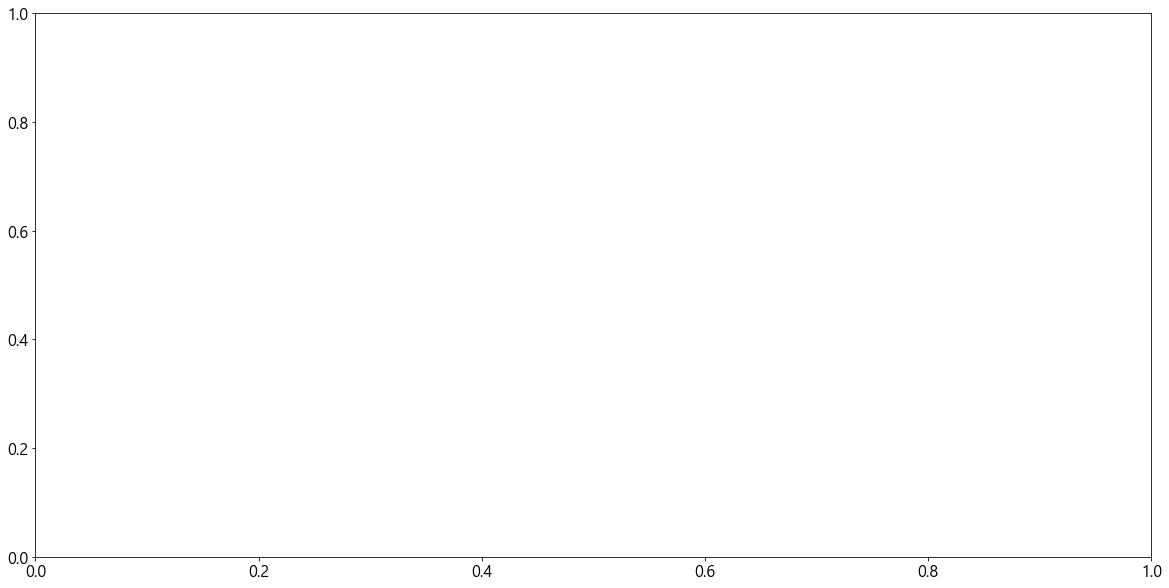

In [74]:
for i in blood_copy3.index:
    plt.plot(blood_copy2.loc[f'{i}'], 'bo-', label = f'{i}지역 헌혈률')
    plt.plot(blood_copy3.mean(), 'r-', label = '전체 평균 헌혈률')
    plt.title(f'{i} 지역 헌혈률')
    plt.legend()
    plt.ylim(0, 12)
    plt.xlabel('년도')
    plt.ylabel('헌혈률')    
    plt.savefig(f'지역별 헌혈률/{i}년 지역 헌혈률')
    plt.cla()
#     plt.show()

기존에 평균이하의 헌혈율을 보이는 곳들은 헌혈자수가 떨어지는 기간에도 영향이 없음

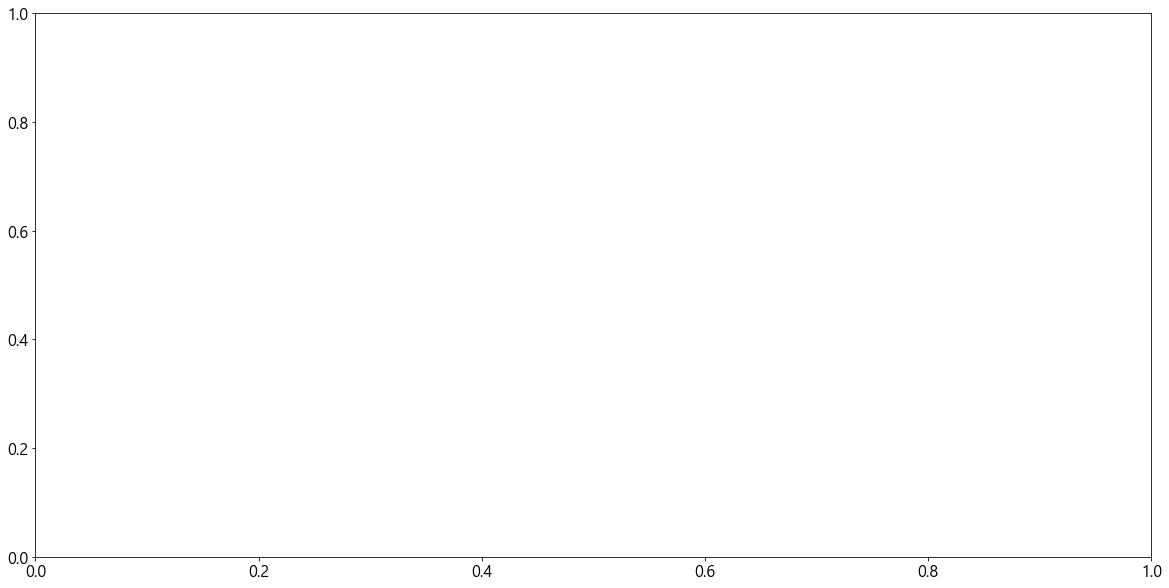

In [52]:
for i in blood_copy3.columns:
    plt.bar(blood_copy3.index, blood_copy3[f'{i}'])
    plt.title(f'{i}년도 지역별 헌혈률')
    plt.ylim(0, 10)
    plt.xlabel('지역')
    plt.ylabel('헌혈률')    
    plt.savefig(f'지역별 헌혈률/{i}년 지역 헌혈률')
    plt.cla()
#     plt.show()